# How to read the posterior file

The posterior samples are stored as datasets in the `samples` group of `posterior.hdf`. Below we demonstrate how to read the samples and make a simple histogram of the 1D marginal distance.

In [1]:
%matplotlib notebook
from matplotlib import pyplot

import numpy
import h5py

In [2]:
fp = h5py.File('posterior.hdf', 'r')

The available parameters:

In [7]:
for param in sorted(fp['samples'].keys()):
    print param

dec
distance
inclination
lambda1
lambda2
loglikelihood
mass1
mass2
polarization
ra
spin1z
spin2z
tc


**Note**: In the posterior file, `mass1` is defined to be $\geq$ `mass2`. Likewise, `spin1z` and `lambda1` are the spin and tidal parameter of the more massive compact object. All quantities are in the detector frame.

## Plot the 1D marginal distance

Below we plot the 1D marginal distribution of the distance, with vertical lines at the 5, 50, and 95th percentiles.

<IPython.core.display.Javascript object>


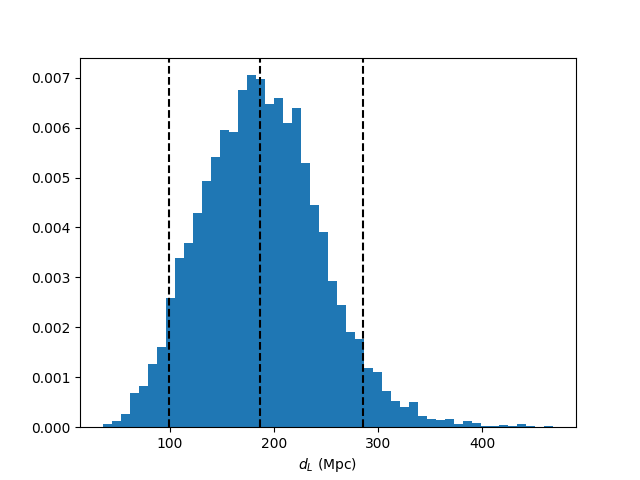

In [13]:
distance = fp['samples/distance'][:]
percentiles = numpy.percentile(distance, [5, 50, 95])
fig, ax = pyplot.subplots()
ax.hist(distance, density=True, bins=50)
for dl in percentiles:
    ax.axvline(dl, linestyle='--', color='k')
ax.set_xlabel('$d_L$ (Mpc)')
fig.show()

## Metadata

Metadata about the run, such as the parameters that were kept fixed through the run, are stored in the file's `.attrs`. In addition, the log likelihood of the noise is stored in the `samples` group's `.attrs` as `lognl`. Subtracting this from the `loglikelihood` gives the log likelihood ratio, from which we can get the coherent matched filter SNR. For example, the maximum likelihood SNR is:

In [14]:
loglikelihood = fp['samples/loglikelihood'][:]
loglr = loglikelihood - fp['samples'].attrs['lognl']
# the coherent SNR = sqrt(2 * loglr), Note: This is marginalized over phase, which is less than the peak SNR before marginalization
print((2*loglr.max())**0.5)

7.955152900190067
